## Import TensorFlow & other libs

In [ ]:
# Import TensorFlow and other Libs
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Additional imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

## Load the dataset

In [ ]:
# Load the dataset
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)


In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# number of classes
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


## Build the model

In [ ]:
# Build the model using functional API
# with IMPROVEMENT: BatchNormalization, DataAugmentation

i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

## Train the model

In [ ]:
print("GPU", "Available Yesss!!!" if tf.config.list_physical_devices("GPU") else "Not available! :(")

GPU Available Yesss!!!


In [ ]:
## Compile and Fit the model
# Note: make sure you are using the GPU for this:
# Compile
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# Fit
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 31s 19ms/step - loss: 1.2492 - accuracy: 0.5724 - val_loss: 1.3044 - val_accuracy: 0.5463
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8273 - accuracy: 0.7135 - val_loss: 0.8218 - val_accuracy: 0.7218
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6839 - accuracy: 0.7664 - val_loss: 0.7303 - val_accuracy: 0.7479
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5772 - accuracy: 0.7996 - val_loss: 0.6482 - val_accuracy: 0.7793
Epoch 5/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.4818 - accuracy: 0.8341 - val_loss: 0.8637 - val_accuracy: 0.7354
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4130 - accuracy: 0.8570 - val_loss: 0.5822 - val_accuracy: 0.8069
Epoch 7/50
1563/1563 [==============================] - 30s 20ms/step - loss: 0.3487 - accuracy: 0.8790 - val_loss: 0.6744 -

### Improved the result with Data Augmentation

In [ ]:
# Fit with Data Augmentation
# Note: if you run this AFTER calling the previous model.fit() it will continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 50s 32ms/step - loss: 0.5397 - accuracy: 0.8273 - val_loss: 0.5190 - val_accuracy: 0.8306
Epoch 2/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.4309 - accuracy: 0.8594 - val_loss: 0.4637 - val_accuracy: 0.8503
Epoch 3/50
1562/1562 [==============================] - 51s 32ms/step - loss: 0.4022 - accuracy: 0.8676 - val_loss: 0.4919 - val_accuracy: 0.8398
Epoch 4/50
1562/1562 [==============================] - 51s 33ms/step - loss: 0.3799 - accuracy: 0.8735 - val_loss: 0.4743 - val_accuracy: 0.8527
Epoch 5/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3599 - accuracy: 0.8798 - val_loss: 0.5347 - val_accuracy: 0.8427
Epoch 6/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3520 - accuracy: 0.8822 - val_loss: 0.4306 - val_accuracy: 0.8603
Epoch 7/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3330 - accuracy: 0.8875 - val_loss: 0.4356 - val_accura

## Evaluate the model

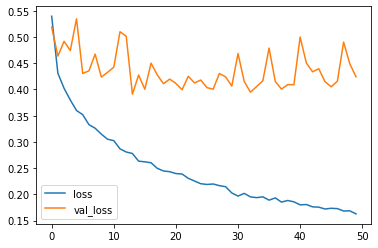

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

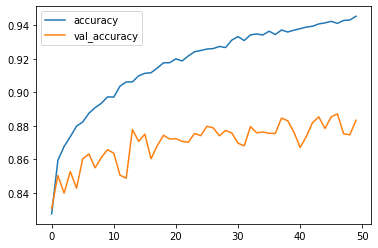

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# Confusion Matrix Function
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[933   9   8   6   6   2   3   4  22   7]
 [  5 969   2   1   1   0   1   1   5  15]
 [ 38   2 787  28  42  25  53  15   5   5]
 [ 12   1  21 743  29  89  68  23   5   9]
 [ 11   1  14  22 882  10  33  23   4   0]
 [ 11   1  12  84  31 811  24  23   0   3]
 [  4   0  10  20   6   4 953   0   2   1]
 [  9   1   7  15  31  16   4 914   1   2]
 [ 42  10   2   4   2   2   4   2 920  12]
 [  9  52   0   2   1   1   1   1  12 921]]


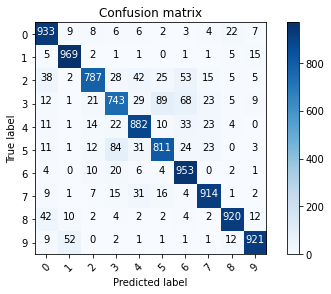

In [ ]:
# Plot Confusion Matrix
pred_test = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(k)))

In [ ]:
# As the model is large, it is useful to summarize
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

## Predicted result: check True-classified example and Misclassified example

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

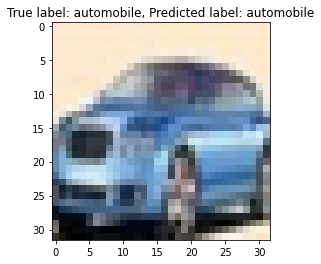

In [ ]:
# Show True-classiied Example
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s, Predicted label: %s" % (labels[y_test[i]], labels[pred_test[i]]));

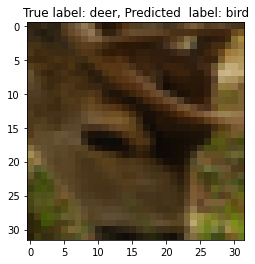

In [ ]:
# Mis-classified Example
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s, Predicted  label: %s" % (labels[y_test[i]], labels[pred_test[i]]));